##Capital Asset Pricing Model

A formula for calculating the expected return of a security based on its systematic risk \\


> $E(R_i) = R_f + \beta \times (E(R_m) - R_f)$


$E(R_i)$ represents the expected return of the investment.

$R_f$ is the risk-free rate.

$\beta$ is the systematic risk of the investment. It tells us how much risk the investors are bearing. Higher risk, higher return

$E(R_m)$ denotes the market risk premium, which is the expected return of the market (Like return of S&P).

$\beta$ is a way to measure systematic risk

Total risk(Volatility) = sytematic(market risk) + unsystematic(firm specific)

Unsystematic risk can be diversified away, hence we deal with systematic risks only

$\beta$ is a percentage of change in the asset/stock return given a 1% change in market portfolio(a portfolio of all firms and asset classes like example S&P 500).
Its the sensitivity of the asset's return to the market portfolio return

In [1]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [2]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2014-01-01'
END_DATE = '2018-12-31'

In [3]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],start=START_DATE,end=END_DATE,progress=False)
df.head(5)

Adj Close                   Close                  High  \
                 AMZN        ^GSPC       AMZN        ^GSPC     AMZN   
Date                                                                  
2014-01-02  19.898500  1831.979980  19.898500  1831.979980  19.9680   
2014-01-03  19.822001  1831.369995  19.822001  1831.369995  20.1355   
2014-01-06  19.681499  1826.770020  19.681499  1826.770020  19.8500   
2014-01-07  19.901501  1837.880005  19.901501  1837.880005  19.9235   
2014-01-08  20.096001  1837.489990  20.096001  1837.489990  20.1500   

                               Low                    Open               \
                  ^GSPC       AMZN        ^GSPC       AMZN        ^GSPC   
Date                                                                      
2014-01-02  1845.859985  19.701000  1827.739990  19.940001  1845.859985   
2014-01-03  1838.239990  19.811001  1829.130005  19.914499  1833.209961   
2014-01-06  1837.160034  19.421000  1823.729980  19.792500  1832.310059   
2014-01-07  1840.099976  19.714500  1828.709961  19.752001  1828.709961   
2014-01-08  1840.020020  19.802000  1831.400024  19.923500  1837.900024   

              Volume              
                AMZN       ^GSPC  
Date                              
2014-01-02  42756000  3080600000  
2014-01-03  44204000  2774270000  
2014-01-06  63412000  3294850000  
2014-01-07  38320000  3511750000  
2014-01-08  46330000  3652140000

REsample monthly data and calculate returns for asset and market benchmark

In [4]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset',MARKET_BENCHMARK: 'market'}).resample('M').last().pct_change().dropna()
X.head(5)

,asset,market
Date,,
2014-02-28,0.009507,0.043117
2014-03-31,-0.071058,0.006932
2014-04-30,-0.095847,0.006201
2014-05-31,0.027685,0.021030
2014-06-30,0.039130,0.019058


In [5]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.6296082618965537

In [6]:
y = X.pop('asset')
X = sm.add_constant(X)
print(X.head(3))
capm_model = sm.OLS(y, X).fit()
print(capm_model.summary())

            const    market
Date                       
2014-02-28    1.0  0.043117
2014-03-31    1.0  0.006932
2014-04-30    1.0  0.006201
                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           4.05e-07
Time:                        21:14:44   Log-Likelihood:                 75.313
No. Observations:                  59   AIC:                            -146.6
Df Residuals:                      57   BIC:                            -142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

**market coeff**: 1.6296 - This is the slope coefficient for the independent variable market. It suggests that for each unit increase in market, asset increases by approximately 1.6296 units. The p-value for market is very small (close to 0), indicating that it is statistically significant.

**Prob (F-statistic)**: 4.05e-07 - This is the probability of observing such a large F-statistic if the null hypothesis were true. A value close to zero indicates that the model is statistically significant.

These results indicate that the **beta** (denoted as market here) is equal to **1.67**,
which means that Amazon's returns are 67% more volatile than the market
(proxied by S&P 500).

##Fama French Three Factor models

The Fama-French Three-Factor Model is typically represented as:

$$
E(R_i) = R_f + \beta_{\text{market}} \times (E(R_m) - R_f) + \beta_{\text{SMB}} \times \text{SMB} + \beta_{\text{HML}} \times \text{HML}
$$

Where:

- $E(R_i)$ is the expected return of the investment.
- $R_f$ is the risk-free rate.
- $\beta_{\text{market}}$, $\beta_{\text{SMB}}$, $\beta_{\text{HML}}$ are the sensitivities (betas) to the three factors.
- $E(R_m) - R_f$ is the market risk premium.
- SMB and HML are the returns associated with the size and value factors, respectively.

**Three Factors of the Fama-French Model**:

Market Risk (Market Factor): Similar to CAPM, the first factor is the excess return of the market portfolio over the risk-free rate. This factor accounts for market-wide risk.

Size Risk (Size Factor - SMB): SMB stands for "Small Minus Big" and represents the size factor. **It is based on the observation that, historically, stocks of smaller companies (small-cap stocks) have tended to outperform stocks of larger companies (large-cap stocks**). The SMB factor is calculated as the difference in returns between small-cap and large-cap stocks. A positive SMB value indicates that small-cap stocks are expected to outperform large-cap stocks.

Value Risk (Value Factor - HML): HML stands for "High Minus Low" and represents the value factor. This factor is based on the historical tendency for **value stocks** (stocks with high book-to-market ratios) **to outperform growth stocks** (stocks with low book-to-market ratios). The HML factor is the difference in returns between value and growth stocks. A positive HML value indicates that value stocks are expected to outperform growth stocks.

In [7]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf

In [8]:
!wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
!unzip -a F-F_Research_Data_Factors_CSV.zip
!rm F-F_Research_Data_Factors_CSV.zip

--2024-01-15 21:14:44--  http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
Resolving mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)... 129.170.136.60
Connecting to mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)|129.170.136.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12803 (13K) [application/x-zip-compressed]
Saving to: ‘F-F_Research_Data_Factors_CSV.zip’

F-F_Research_Data_F 100%[===================>]  12.50K  --.-KB/s    in 0s      

2024-01-15 21:14:44 (112 MB/s) - ‘F-F_Research_Data_Factors_CSV.zip’ saved [12803/12803]

Archive:  F-F_Research_Data_Factors_CSV.zip
  inflating: F-F_Research_Data_Factors.CSV  [binary]


In [9]:
RISKY_ASSET = 'META'
START_DATE = '2013-12-31'
END_DATE = '2018-12-31'

In [10]:
factor_df = pd.read_csv('/content/F-F_Research_Data_Factors.CSV', skiprows=3)
factor_df.head(5)

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [11]:
STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
print(indices.values)
start_of_annual = factor_df[indices].index[0]
print(start_of_annual)
factor_df = factor_df[factor_df.index < start_of_annual]

[False False False ... False False False]
1169


In [12]:
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']
factor_df['date'] = pd.to_datetime(factor_df['date'],format='%Y%m').dt.strftime("%Y-%m")
factor_df = factor_df.set_index('date')
factor_df = factor_df.loc[START_DATE:END_DATE]
factor_df.head(5)


,mkt,smb,hml,rf
date,,,,
2014-01,-3.32,0.89,-2.07,0.00
2014-02,4.65,0.35,-0.31,0.00
2014-03,0.43,-1.81,4.93,0.00
2014-04,-0.19,-4.19,1.17,0.00
2014-05,2.06,-1.88,-0.13,0.00


In [13]:
factor_df.describe()

,mkt,smb,hml,rf
count,60,60,60,60
unique,59,55,59,18
top,1.06,1.14,-0.31,0.00
freq,2,3,2,23


<Axes: xlabel='date'>

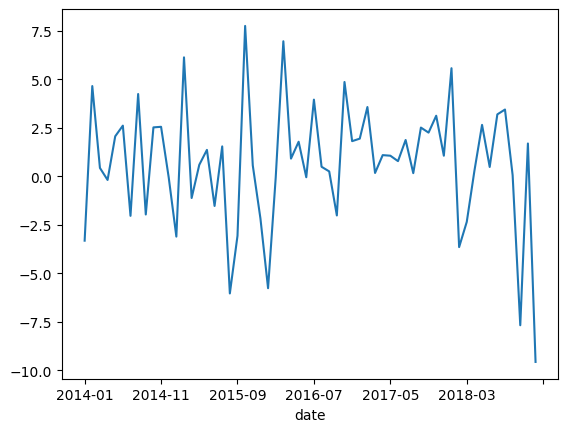

In [14]:
factor_df=factor_df.astype("float64")
factor_df['mkt'].plot()

In [15]:
factor_df=factor_df.div(100)

Downlaod the risky asset

In [16]:
asset_df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE)
asset_df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200
2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400


In [17]:
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'

In [18]:
y.head(5)

Date
2014-01    0.144922
2014-02    0.094135
2014-03   -0.120070
2014-04   -0.007636
2014-05    0.058883
Name: rtn, dtype: float64

In [19]:
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

We need to estimate the excess return

In [20]:
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml',data=ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     5.127
Date:                Mon, 15 Jan 2024   Prob (F-statistic):            0.00333
Time:                        21:14:46   Log-Likelihood:                 88.334
No. Observations:                  60   AIC:                            -168.7
Df Residuals:                      56   BIC:                            -160.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0104      0.008      1.366      0.1

##Rolling three-factor model on a portfolio of assets

What we
mean by rolling is that we always consider an estimation window of a constant size (60 months, in this case) and roll it through the entire dataset, one period at a time. A potential
reason for doing such an experiment is to test the stability of the results.

In [21]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web
import numpy as np

We'll form a portfolio using 4 assets and giving them equal wieghts in the portfolio

In [22]:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']
WEIGHTS = [0.25, 0.25, 0.25, 0.25]
START_DATE = '2009-12-31'
END_DATE = '2018-12-31'

In [23]:
df_three_factor = web.DataReader('F-F_Research_Data_Factors',
'famafrench', start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()

In [24]:
asset_df = yf.download(ASSETS, start=START_DATE, end=END_DATE, progress=False)
asset_df.head(5)

Adj Close                                   Close          \
                AAPL    AMZN       GOOG       MSFT      AAPL    AMZN   
Date                                                                   
2009-12-31  6.379697  6.7260  15.441621  23.118435  7.526071  6.7260   
2010-01-04  6.478998  6.6950  15.610239  23.474916  7.643214  6.6950   
2010-01-05  6.490199  6.7345  15.541497  23.482506  7.656429  6.7345   
2010-01-06  6.386963  6.6125  15.149715  23.338392  7.534643  6.6125   
2010-01-07  6.375158  6.5000  14.797037  23.095680  7.520714  6.5000   

                                      High          ...        Low             \
                 GOOG       MSFT      AAPL    AMZN  ...       GOOG       MSFT   
Date                                                ...                         
2009-12-31  15.441621  30.480000  7.619643  6.8640  ...  15.441621  30.480000   
2010-01-04  15.610239  30.950001  7.660714  6.8305  ...  15.547723  30.590000   
2010-01-05  15.541497  30.959999  7.699643  6.7740  ...  15.480475  30.639999   
2010-01-06  15.149715  30.770000  7.686786  6.7365  ...  15.102393  30.520000   
2010-01-07  14.797037  30.450001  7.571429  6.6160  ...  14.760922  30.190001   

                Open                                   Volume             \
                AAPL    AMZN       GOOG       MSFT       AAPL       AMZN   
Date                                                                       
2009-12-31  7.611786  6.8545  15.560426  30.980000  352410800   90460000   
2010-01-04  7.622500  6.8125  15.615220  30.620001  493729600  151998000   
2010-01-05  7.664286  6.6715  15.620949  30.850000  601904800  177038000   
2010-01-06  7.656429  6.7300  15.588072  30.879999  552160000  143576000   
2010-01-07  7.562500  6.6005  15.178109  30.629999  477131200  220604000   

                                 
                 GOOG      MSFT  
Date                             
2009-12-31   48974884  31929700  
2010-01-04   78541293  38409100  
2010-01-05  120638494  49749600  
2010-01-06  159744526  58182400  
2010-01-07  257533695  50559700  

[5 rows x 24 columns]

In [25]:
asset_df = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
asset_df.index = asset_df.index.strftime('%Y-%m')
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values,WEIGHTS)
asset_df.head(5)

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2010-01,-0.088597,-0.067722,-0.145230,-0.075459,-0.094252
2010-02,0.065396,-0.055897,-0.005925,0.022145,0.006430
2010-03,0.148471,0.146706,0.076538,0.021626,0.098335
2010-04,0.111021,0.009796,-0.073036,0.042676,0.022614
2010-05,-0.016125,-0.084902,-0.076222,-0.151395,-0.082161


In [26]:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf


In [27]:
def rolling_factor_model(input_data, formula, window_size):
  coeffs = []
  for start_index in range(len(input_data) - window_size + 1):
    end_index = start_index + window_size
    ff_model = smf.ols(
    formula=formula,
    data=input_data[start_index:end_index]).fit()
    coeffs.append(ff_model.params)
  coeffs_df = pd.DataFrame(coeffs,index=input_data.index[window_size - 1:])
  return coeffs_df

<Axes: title={'center': 'Rolling Fama-French Three-Factor model'}, xlabel='Date'>

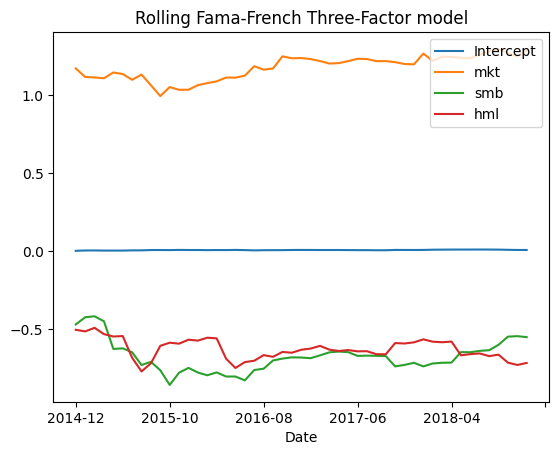

In [28]:
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, MODEL_FORMULA, window_size=60)
results_df.plot(title = 'Rolling Fama-French Three-Factor model')

- The intercept is almost constant and very close to 0.
- There is some variability in the factors, but no sudden reversals or
unexpected jumps.

##Modelling Volatility using GARCH models

**Volatility** is a very important concent in the world of finance and is **directly related to risk**

- Volatility has a significant impact on risk
management, where it is used to calculate metrics such as the Value-at-Risk (VaR) of a
portfolio
- Volatility is generally accepted as the best measure of market risk and volatility forecasting is used in many different applications across the industry

**Conditional Variance** is a measure of our uncertainity about a variable given a set of information. That is the variance depends on some external factors(Heteroscedasticity)

**ARCH models**: Autoregression Conditional Heteroscedasticity model volatility that changes over time. Autoregressive part says that the volatility will depend on volatility in past time stamps

In [29]:
!pip install arch --quiet
import pandas as pd
import yfinance as yf
from arch import arch_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 4.9 MB/s eta 0:00:00


In [30]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

In [31]:
df = yf.download(RISKY_ASSET,start=START_DATE,end=END_DATE,)
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


<Axes: title={'center': 'GOOG returns: 2015-01-01 - 2018-12-31'}, xlabel='Date'>

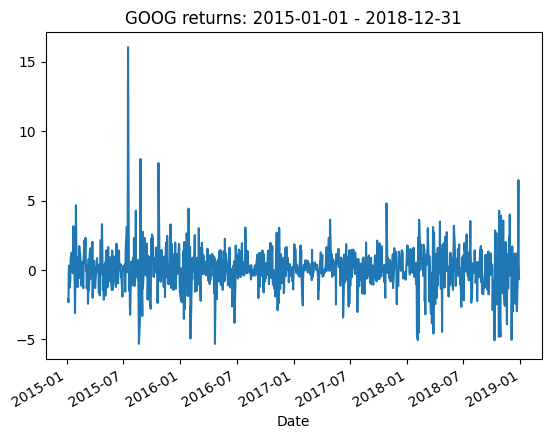

In [32]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

This plot decipts some spikes in returns and signs of volatility clustering

In [33]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1799.00
Distribution:                  Normal   AIC:                           3602.00
Method:            Maximum Likelihood   BIC:                           3611.83
                                        No. Observations:                 1004
Date:                Mon, Jan 15 2024   Df Residuals:                     1004
Time:                        23:14:20   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6292      0.167      9.736  2.128e-22   [  1.30

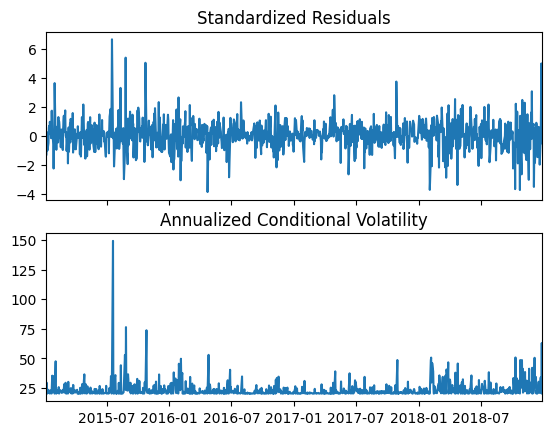

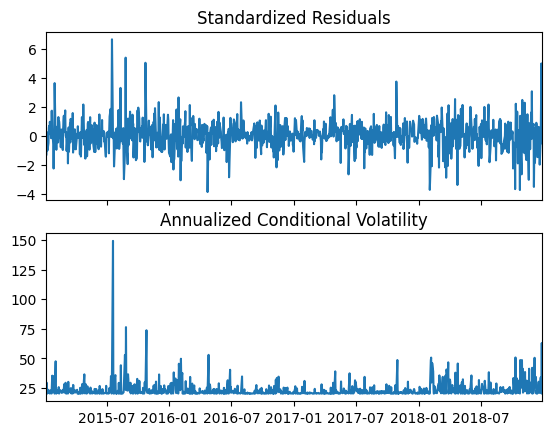

In [34]:
model_fitted.plot(annualize='D')

##Something (To be named...)

In [35]:
!pip install arch --quiet

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
import yfinance as yf

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [37]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
seed=2021

In [38]:
start = datetime(2014, 1, 1)
end = datetime(2021, 8, 31)


tckr = 'BTC-USD'

ticker = yf.Ticker(tckr)
df = ticker.history(start=start,
                    end=end,
                    interval="1d")
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


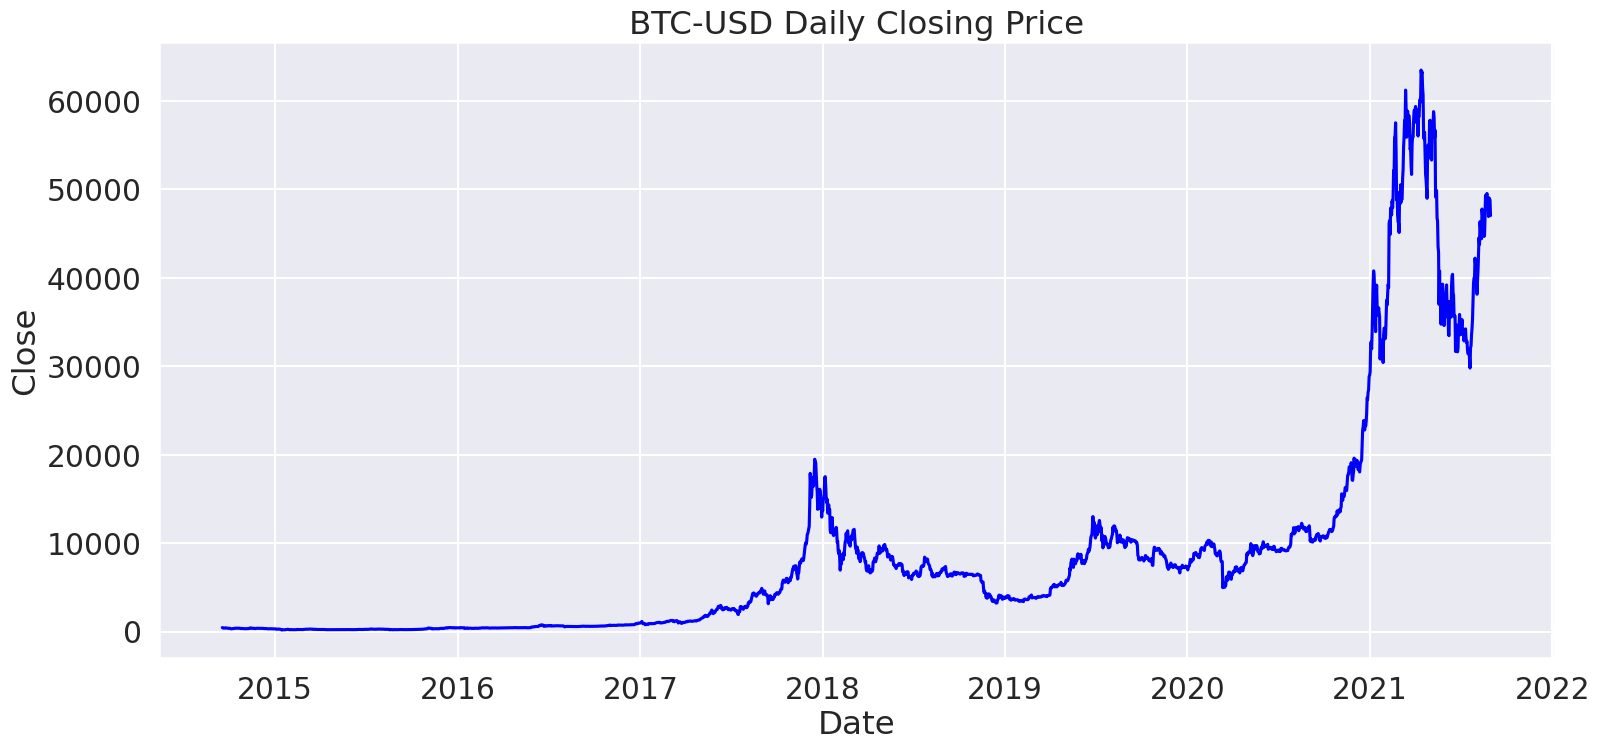

In [39]:
sns.set_context("talk", font_scale=1.3)

# PLOT OUT BTC-USE'S CLOSING PRICES SINCE 2014
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.index, y=df.Close, color='blue')
    ax.set_title('BTC-USD Daily Closing Price')

Volatility can either be historical or implied; both are usually expressed in percentage terms.

- **Historical Volatility (HV) or Realized Volatility** is the actual volatility demonstrated by the underlying over a period of time, such as the past month or year. Realized Volatility is commonly calculated as the standard deviation of price returns,
which is the dollar change in price as a percentage of previous day's price.

- **Implied volatility (IV)**, on the other hand, is the level of volatility of the underlying that is implied by the current option price. It represents the market's forecast of a likely movement in a security's price and is derived from the market price of an option contract.

- Unlike historical volatility, which looks at actual asset price movements in the past, implied volatility is forward-looking and reflects the market's expectations of future volatility

In [40]:
df['returns'] = 100 * df.Close.pct_change().dropna()


We can also try to take log of returns as it helps to eliminate non stationarity properties of time seires and makes it more stable.

$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})$


In [41]:
df['log_returns'] = np.log(df.Close/df.Close.shift(1))
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns
Date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,-7.192558,-0.074643
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,-6.984265,-0.072402
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,3.573492,0.035111
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,-2.465854,-0.024968


In [42]:
df.dropna(inplace=True)

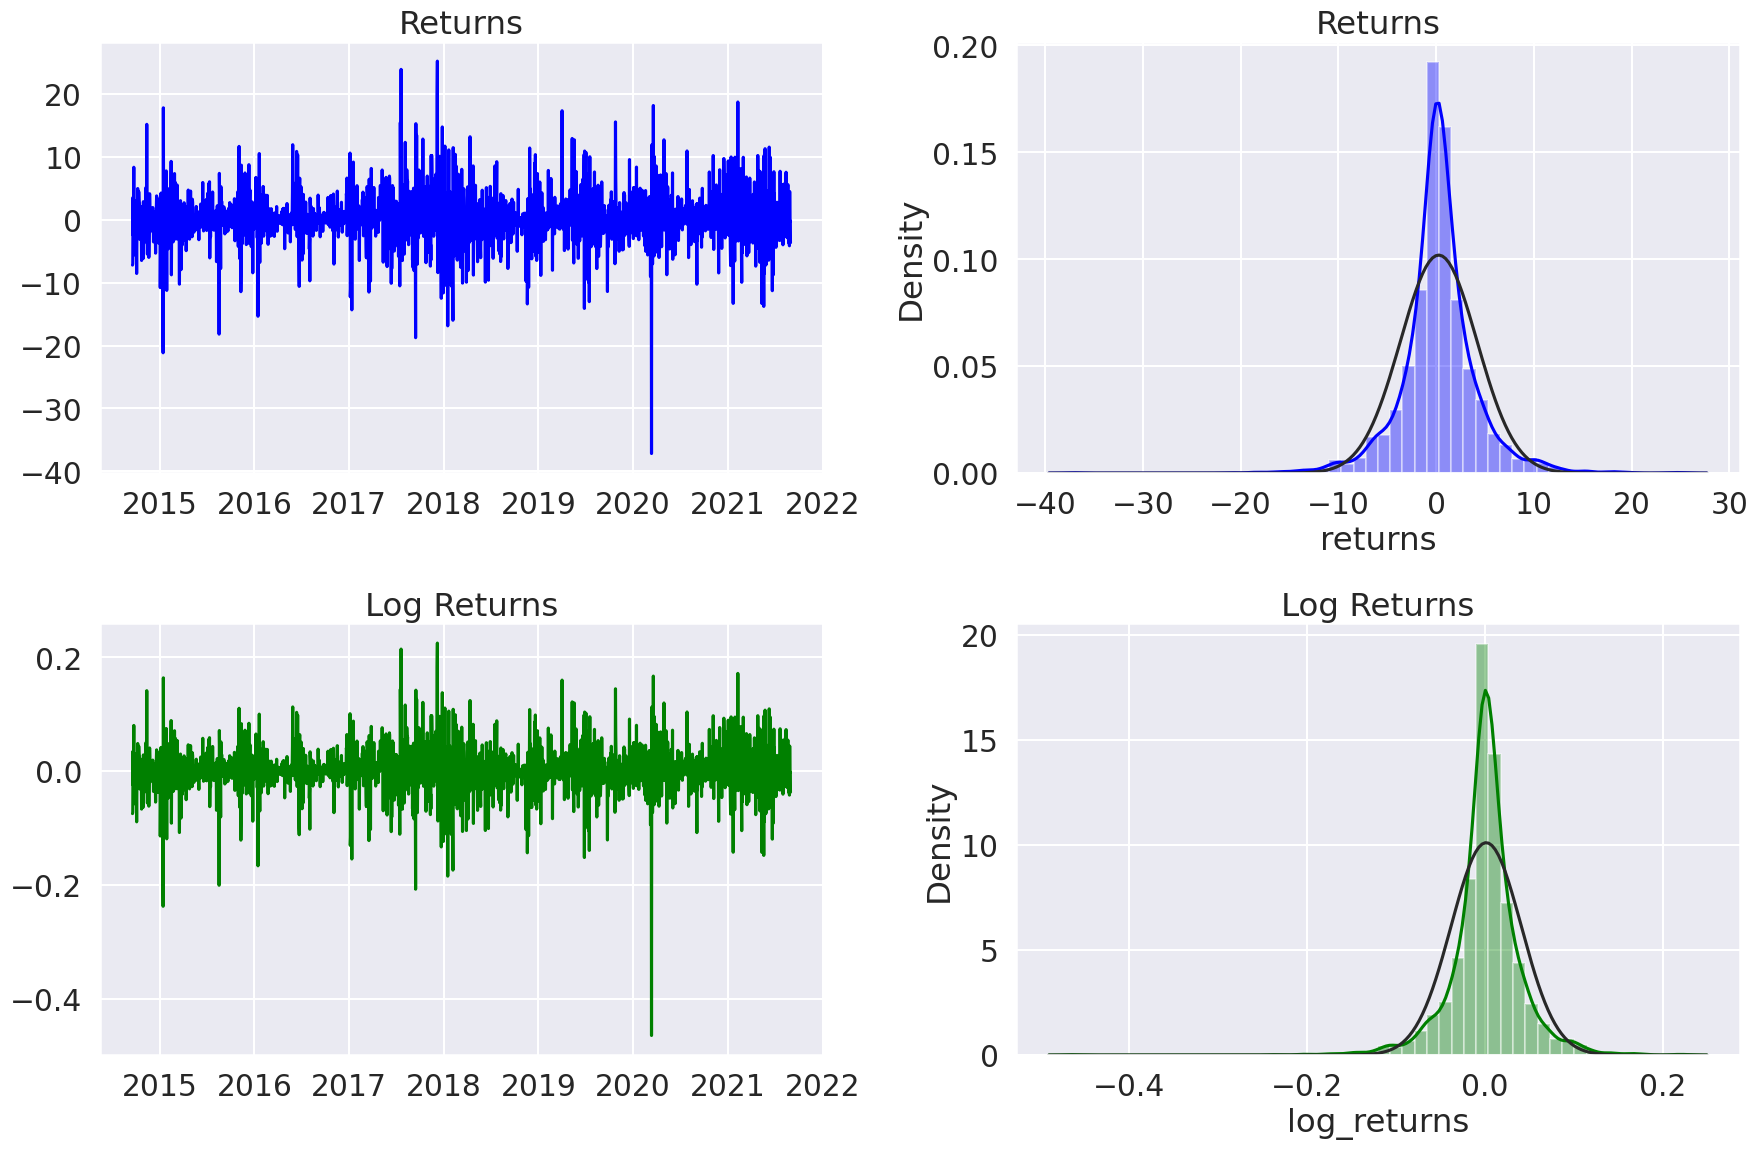

In [43]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(df.returns, color='blue')
    axes[0][0].set_title('Returns')

    sns.distplot(df.returns, norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns')

    axes[1][0].plot(df.log_returns, color='green')
    axes[1][0].set_title('Log Returns')

    sns.distplot(df.log_returns, norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()

    fig.show();

For this specific project, the volatility would be for a certain fixed interval window (INTERVAL_WINDOW) is the standard deviation of log returns, or the square root of the sum of squares of log returns:

$σ_{interval} = \sqrt{\sum_t{r^2_{t-1,t}}}$

In [44]:
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval
    """
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

In [45]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

for i in intervals:
    vols = df.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

vols_df = pd.DataFrame(vols_df, columns=intervals, index=df.index)


In [46]:
vols_df.head(10)

,7,30,60,180,365
Date,,,,,
2014-09-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-09-24 00:00:00+00:00,0.057809,NaN,NaN,NaN,NaN
2014-09-25 00:00:00+00:00,0.050425,NaN,NaN,NaN,NaN
2014-09-26 00:00:00+00:00,0.041475,NaN,NaN,NaN,NaN


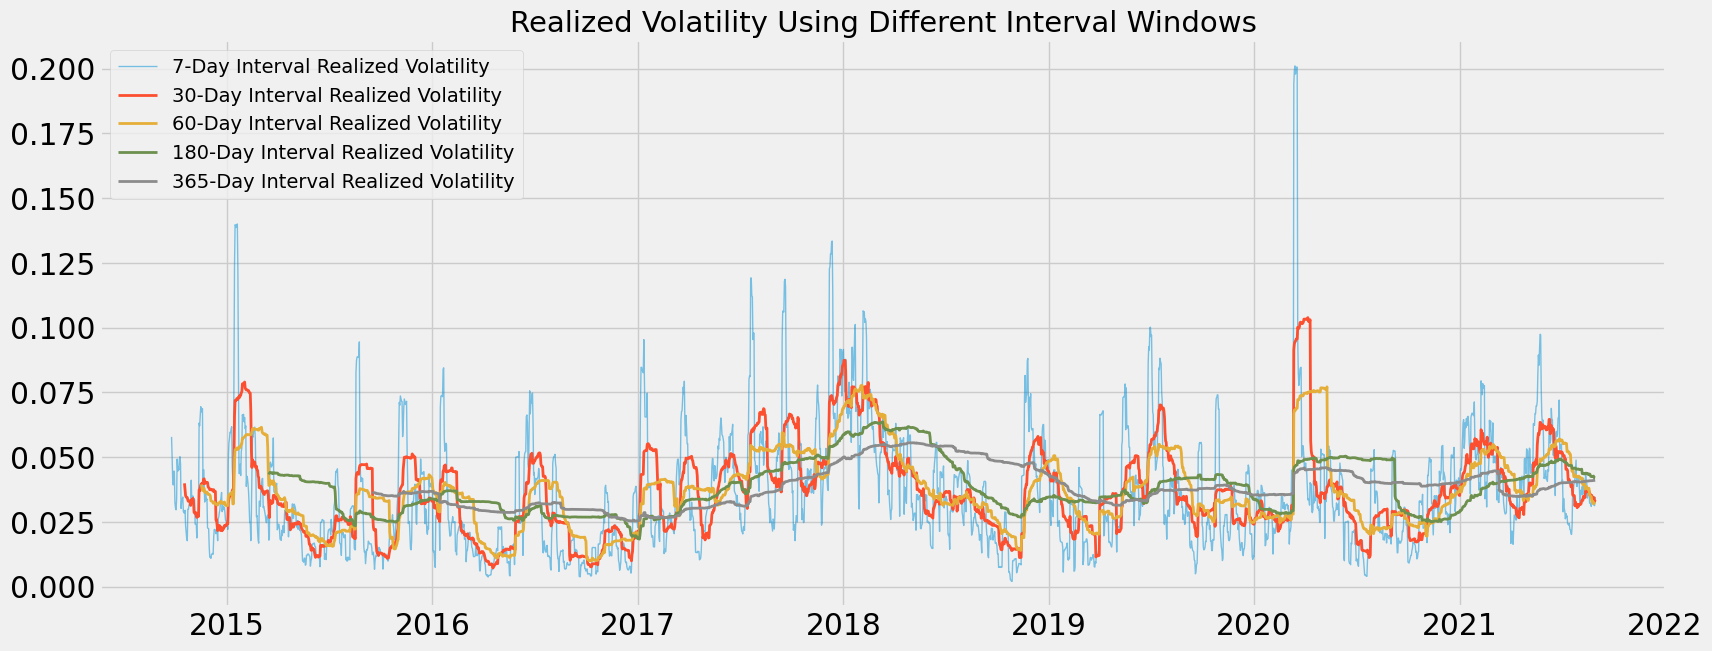

In [47]:
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility',
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
plt.show();

7 days volatility seems to be too noisy to work with and for periodsabove 60, the volatility seems to be mean reverting. To get the current approximation we can work with 30 days volitility

In [48]:
INTERVAL_WINDOW = 30
n_future = 7 # we are trying to predict the volitility of 7th day in future

# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY
# df['vol_future'] = df.log_returns.shift(-n_future).rolling(window=INTERVAL_WINDOW).apply(realized_volatility_daily)

df['vol_future'] = df.vol_current.shift(-n_future)
df.head(50)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns,vol_current,vol_future
Date,,,,,,,,,,,
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,-7.192558,-0.074643,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,-6.984265,-0.072402,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,3.573492,0.035111,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,-2.465854,-0.024968,NaN,NaN
2014-09-22 00:00:00+00:00,399.100006,406.915985,397.130005,402.152008,24127600,0.0,0.0,0.835210,0.008317,NaN,NaN
2014-09-23 00:00:00+00:00,402.092010,441.557007,396.196991,435.790985,45099500,0.0,0.0,8.364742,0.080333,NaN,NaN
2014-09-24 00:00:00+00:00,435.751007,436.112000,421.131989,423.204987,30627700,0.0,0.0,-2.888081,-0.029306,NaN,NaN
2014-09-25 00:00:00+00:00,423.156006,423.519989,409.467987,411.574005,26814400,0.0,0.0,-2.748309,-0.027868,NaN,NaN
2014-09-26 00:00:00+00:00,411.428986,414.937988,400.009003,404.424988,21460800,0.0,0.0,-1.736994,-0.017523,NaN,NaN


In [49]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df.describe()


,Open,High,Low,Close,Volume,returns,log_returns,vol_current,vol_future
count,2539.000000,2539.000000,2539.000000,2539.000000,2.539000e+03,2539.000000,2539.000000,2510.000000,2510.000000
mean,8681.166269,8929.541857,8411.818657,8699.331872,1.348326e+10,0.260028,0.001825,0.036331,0.036331
std,12796.869340,13191.400463,12347.219811,12818.326001,1.996122e+10,3.914642,0.039483,0.017227,0.017227
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,-37.169539,-0.464730,0.007228,0.007228
25%,574.092499,578.319000,568.903992,574.212494,7.275385e+07,-1.280782,-0.012891,0.024471,0.024471
50%,5204.105469,5319.986328,5055.194824,5210.515625,4.333440e+09,0.199896,0.001997,0.034003,0.034003
75%,9511.579102,9682.253906,9302.726074,9514.672852,2.120531e+10,1.825499,0.018090,0.046009,0.046009
max,63523.753906,64863.097656,62208.964844,63503.457031,3.509679e+11,25.247169,0.225119,0.103878,0.103878


In [50]:
df.dropna(inplace=True)

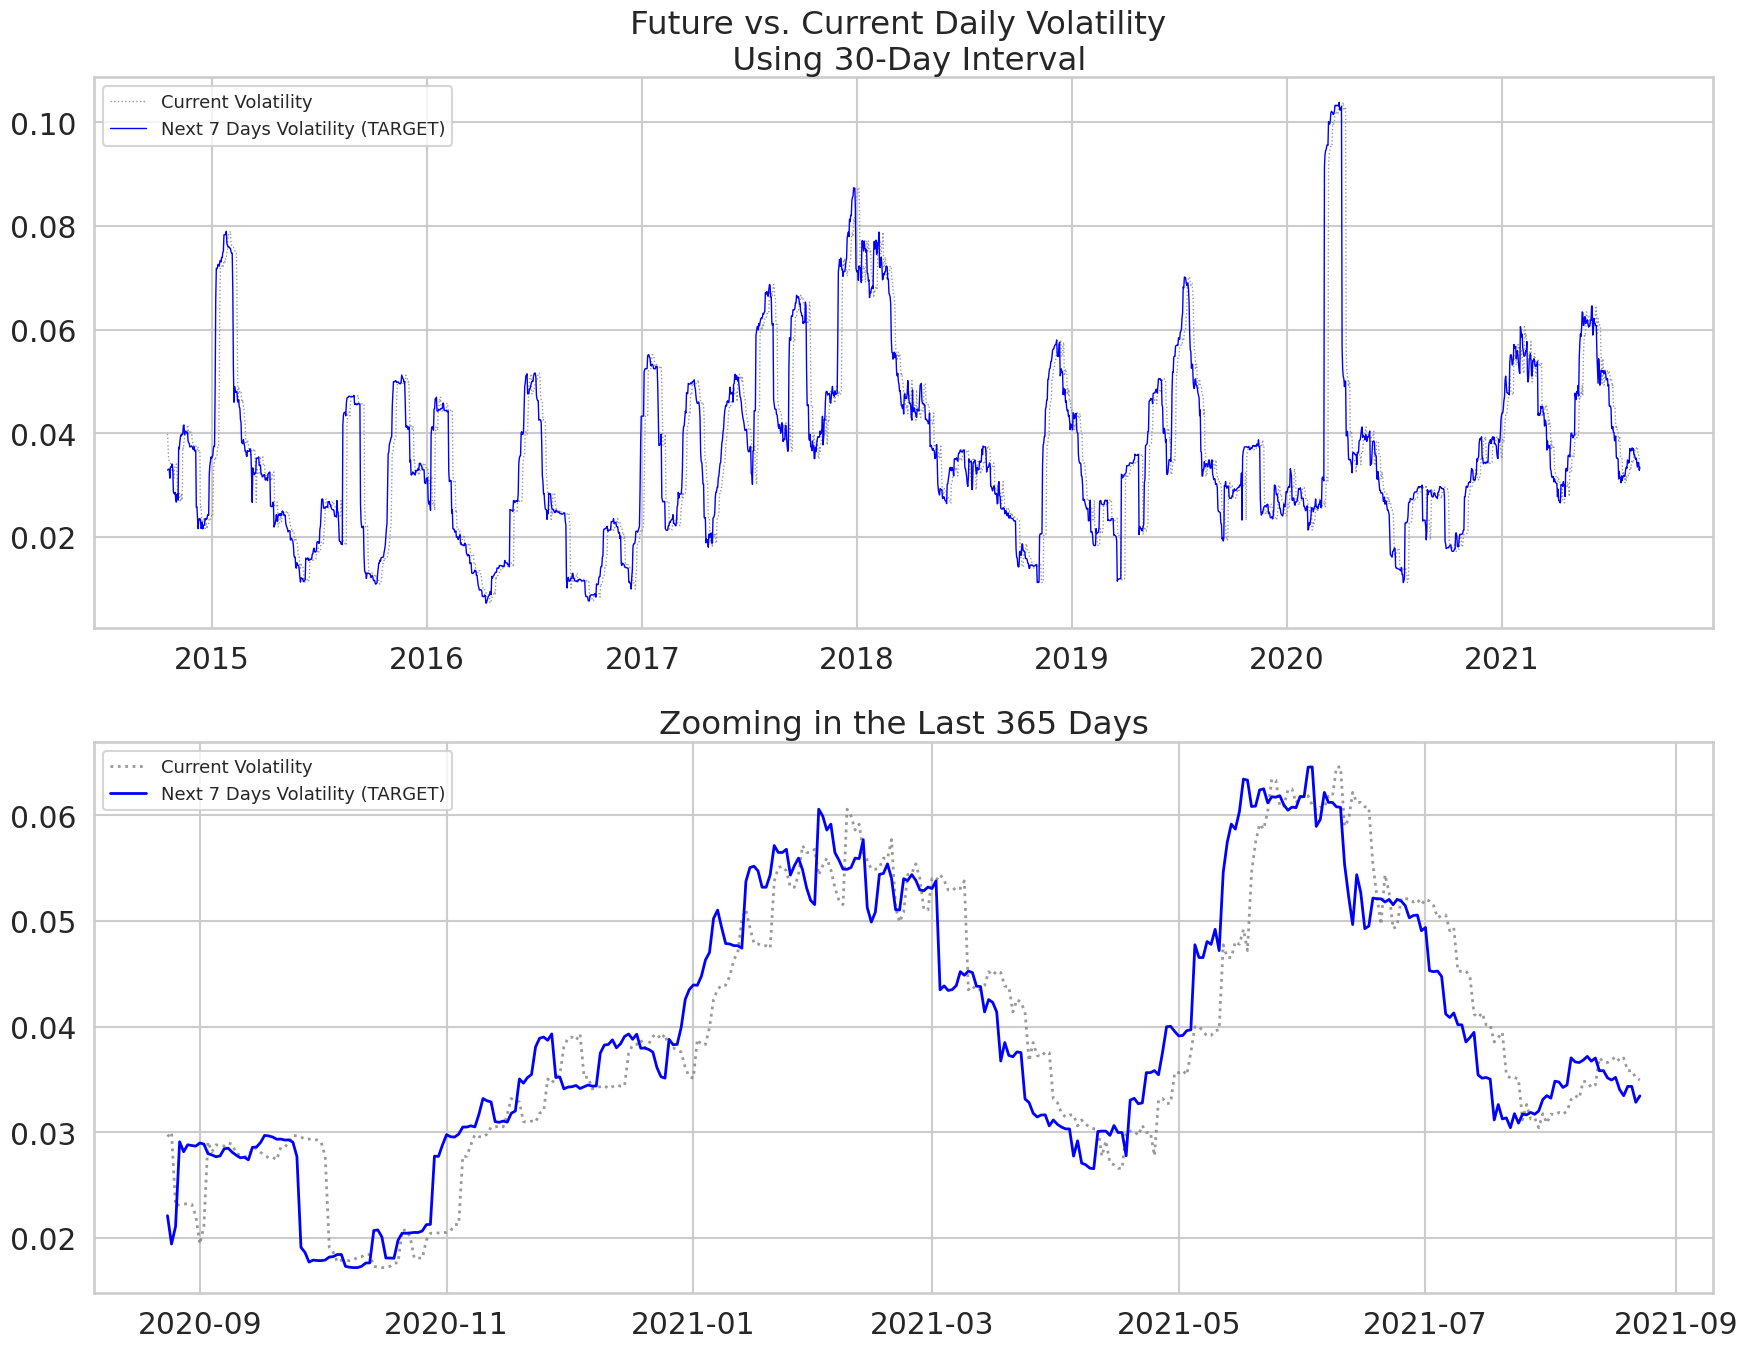

In [51]:
n_zoom = 365
sns.set_context("talk", font_scale=1.3)
# plt.style.use(['seaborn'])

# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
    plt.show();

Checking stationarity of log returns and returns

In [52]:
adfuller_results = adfuller(df.log_returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -15.071204044535708
p-value: 8.719632644592845e-28
Critical Values:
1%: -3.4330
5%: -2.8627
10%: -2.5674


In [53]:
adfuller_results = adfuller(df.returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -15.02310828924831
p-value: 1.0155301109877661e-27
Critical Values:
1%: -3.4330
5%: -2.8627
10%: -2.5674


For both returns and log_returns the p-values are significantly small, hence we can say that both of these series are not stationary

Since cryptocurrencies are not traded on a regulated exchange, the Bitcoin market is open 24/7, 1 year covers a whole 365 trading days instead of 252 days a year like with other stocks and commodities

In [54]:
#Split train, validation and test data
test_size = 30
val_size = 365

split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

In [55]:

print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2014-10-17 00:00:00+00:00 	to: 2020-07-24 00:00:00+00:00 	2108 days
VALIDATION 	From: 2020-07-25 00:00:00+00:00 	to: 2021-07-24 00:00:00+00:00 	365 days
TEST 		From: 2021-07-25 00:00:00+00:00 	to: 2021-08-23 00:00:00+00:00 	30 days


In [56]:
x_train, x_val, x_test = df.vol_current[train_idx],df.vol_current[val_idx],df.vol_current[test_idx]
y_train,y_val,y_test=df.vol_future[train_idx],df.vol_future[val_idx],df.vol_future[test_idx]
r_train ,r_va, r_test = df.returns[train_idx],df.returns[val_idx],df.returns[test_idx]
lr_train,lr_val,lr_test = df.log_returns[train_idx], df.log_returns[val_idx], df.log_returns[test_idx]

In [57]:
x_val.head(5)

Date
2020-07-25 00:00:00+00:00    0.011460
2020-07-26 00:00:00+00:00    0.012075
2020-07-27 00:00:00+00:00    0.022652
2020-07-28 00:00:00+00:00    0.022601
2020-07-29 00:00:00+00:00    0.022802
Name: vol_current, dtype: float64

Feature mormalization using minmaxScaler

In [58]:
scaler_vol_x = MinMaxScaler()
scaler_vol_y = MinMaxScaler()


x_train_scaled = pd.Series(scaler_vol_x.fit_transform(x_train.values.reshape(-1,1))[:,0],index=x_train.index) #(scaler_vol, x_train)
y_train_scaled = pd.Series(scaler_vol_y.fit_transform(y_train.values.reshape(-1,1))[:,0],index=y_train.index) #transform_volatility_to_scaler(scaler_vol, y_train)

# TRANSFORMING VALIDATION CURRENT & FUTURE VOLATILITIES
x_val_scaled = pd.Series(scaler_vol_x.fit_transform(x_val.values.reshape(-1,1))[:,0],index=x_val.index)
y_val_scaled = pd.Series(scaler_vol_y.fit_transform(y_val.values.reshape(-1,1))[:,0],index=y_val.index)

# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = pd.Series(scaler_vol_x.fit_transform(x_test.values.reshape(-1,1))[:,0],index=x_test.index)
y_test_scaled = pd.Series(scaler_vol_y.fit_transform(y_test.values.reshape(-1,1))[:,0],index=y_test.index)

In [59]:
x_train_scaled.head(5)

Date
2014-10-17 00:00:00+00:00    0.337754
2014-10-18 00:00:00+00:00    0.313894
2014-10-19 00:00:00+00:00    0.288269
2014-10-20 00:00:00+00:00    0.283501
2014-10-21 00:00:00+00:00    0.280738
dtype: float64

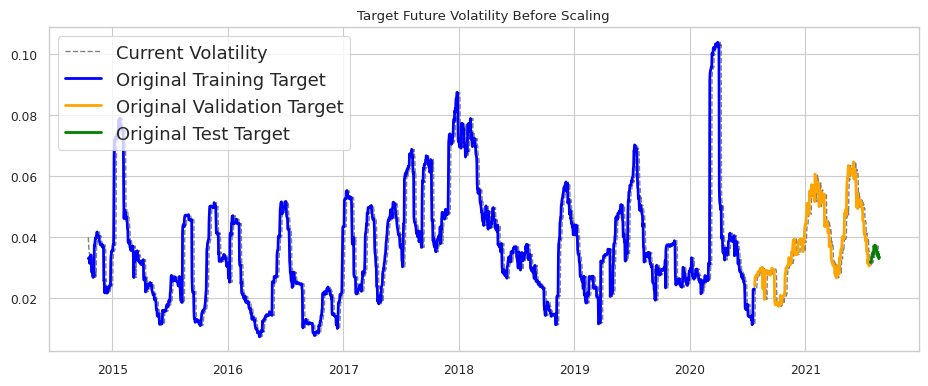

In [60]:
sns.set_context("paper", font_scale=1)

# VISUALIZE TRAIN/VALIDATION/TEST vol_future BEFORE & AFTER TRAINING
with sns.axes_style("whitegrid"):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

    ax1.plot(df.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)
    ax1.title.set_text('Target Future Volatility Before Scaling')
    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.show();


Evaluation metric

RMSPE calculates the square root of the average of the squared percentage errors. The formula for RMSPE is:

$ \text{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \frac{A_i - F_i}{A_i} \right)^2} $

Where:

-  n  is the number of observations.
-  $A_i$  is the actual value for the i-th observation.
-  $F_i$ is the forecasted value for the i-th observation.

Unlike RMSE, which is scale-dependent (its value depends on the scale of the data), RMSPE is a relative measure and is expressed as a percentage. This makes it particularly useful for comparing forecast accuracy


In [95]:
# def RMSPE(y_true, y_pred):
#     output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
#     return output
def RMSPE(y_true, y_pred):
    # Filter out cases where y_true is zero
    mask = y_true != 0
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    # Calculate RMSPE only on filtered data
    output = np.sqrt(np.mean(np.square((y_true_filtered - y_pred_filtered) / y_true_filtered)))
    return output

def RMSE(y_true, y_pred):
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [96]:
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE'])
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name,
                                       RMSPE(y_true, y_pred),
                                       RMSE(y_true, y_pred)]
    return perf_df

In [63]:
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")

        plt.plot(y_true, color='blue', lw=2,
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')

        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

GARCH Model

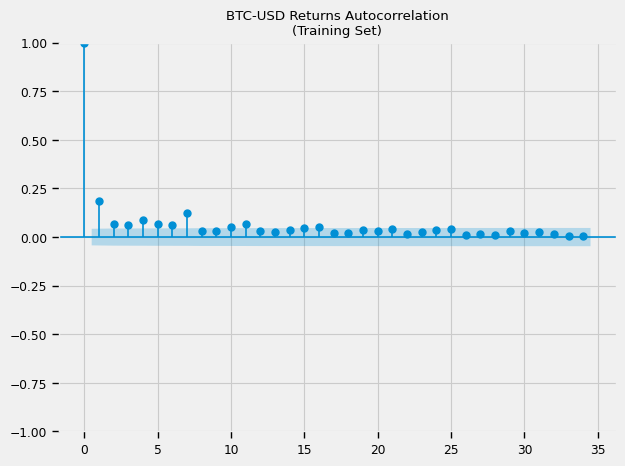

In [64]:
plot_acf(r_train**2, title=f'{tckr.upper()} Returns Autocorrelation\n(Training Set)');

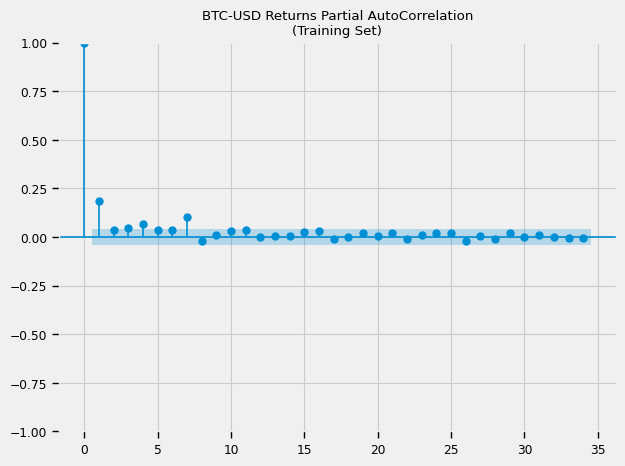

In [65]:
plot_pacf(r_train**2,
          title=f'{tckr.upper()} Returns Partial AutoCorrelation\n(Training Set)');

The autocorrelation plots show that there is significant correlation up till 7th lag, afte that it diminishes

We will set the moving average  lags for the residuals to be 7, i.e q=7 and the autoregressive lags for variances p=7. This is a GARCH model since we have both p and q parameters   

In [66]:
from arch import arch_model
np.random.seed(seed)

gm_1 = arch_model(r_train, p=7, q=7)
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5612.30
Distribution:                  Normal   AIC:                           11256.6
Method:            Maximum Likelihood   BIC:                           11347.1
                                        No. Observations:                 2108
Date:                Mon, Jan 15 2024   Df Residuals:                     2107
Time:                        23:23:48   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1787  7.549e-02      2.367  1.792e-02 [3.074e-

However, as we can see for 0.05 significance level, the p-values of all the coefficients are above 0.05 indicating that none of them are significant. Let's try to reduce p and q to the first lag only

In [98]:
gm_1 = arch_model(r_train, vol='GARCH', p=1, q=1)
result_1 = gm_1.fit(disp='off')
print(result_1.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5628.11
Distribution:                  Normal   AIC:                           11264.2
Method:            Maximum Likelihood   BIC:                           11286.8
                                        No. Observations:                 2108
Date:                Tue, Jan 16 2024   Df Residuals:                     2107
Time:                        00:43:58   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1993  6.626e-02      3.007  2.636e-03 [6.939e-0

These coefficients are statistically significant

In [99]:
def scale_tf_cond_vol(model_result):
    '''
    Scale & Transform Conditional Volatility
    Estimated by GARCH Models
    '''
    # OBTAIN ESTIMATED CONDITIONAL VOLATILITY FROM MODEL RESULT
    cond_vol = model_result.conditional_volatility

    # INITIATE SCALER
    scaler = MinMaxScaler()

    # FIT SCALER TO MODEL'S ESTIMATED CONDITIONAL VOLATILITY
    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = pd.Series(scaler.transform(cond_vol.values.reshape(-1,1))[:,0],index=cond_vol.index) #transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [100]:
scaler_garch, scaled_cond_vol = scale_tf_cond_vol(result_1)


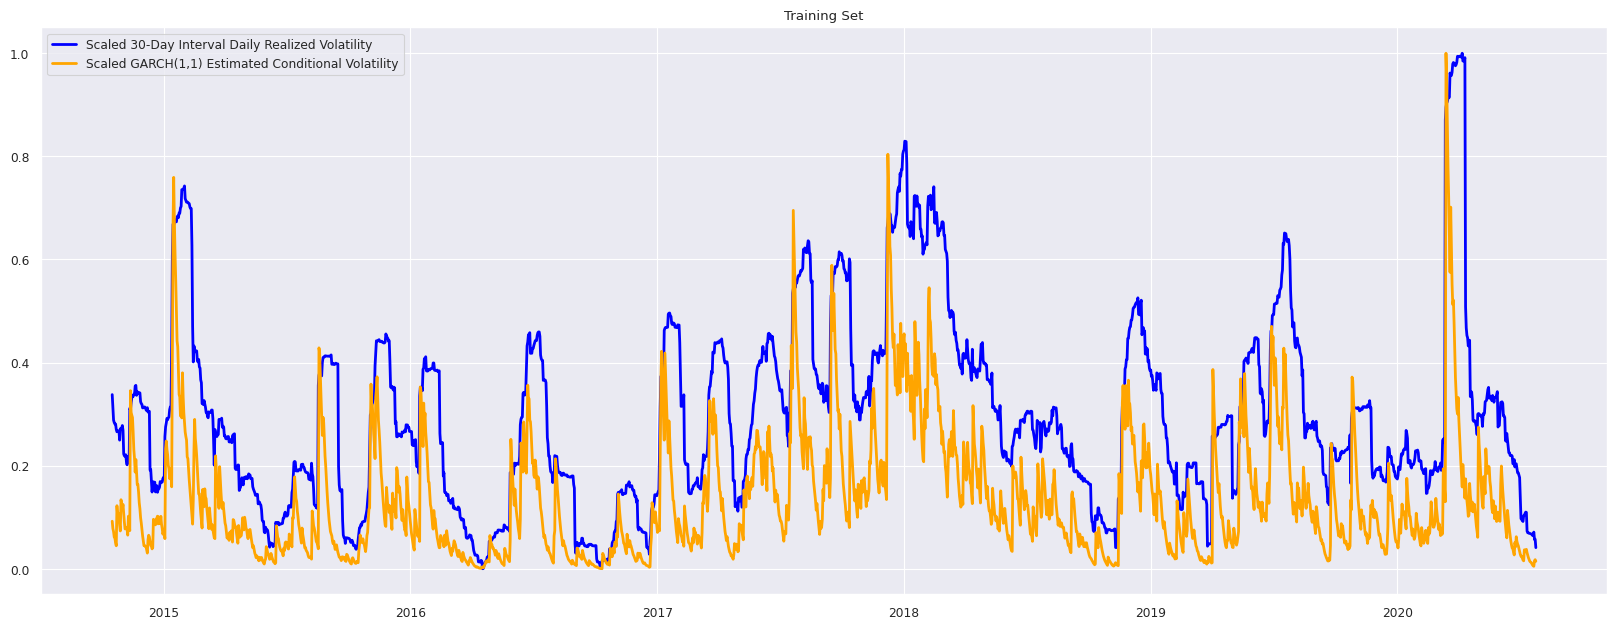

In [82]:
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {INTERVAL_WINDOW}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='orange', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show();
viz_cond_vol(scaled_cond_vol, 'GARCH(1,1)')


**Rolling Forecast:** For validation data ,we will make the predictions one by one in a waterfall manner where we will take n-1 data points from train and validation set, train the mode and predict volitility for the nth data point

In [83]:
n_future

7

In [85]:
rolling_forecasts = []
idx = df.index

#For every point in time series
for i in range(len(val_idx)):

    idx = val_idx[i]
    train = df.returns[:idx]


    model = arch_model(train, vol='GARCH', p=1, q=1,dist='normal')
    model_fit = model.fit(disp='off')

    # Make prediction n_future days
    vaR = model_fit.forecast(horizon=n_future,
                             reindex=False).variance.values
    # print(vaR)
    pred = np.sqrt(np.mean(vaR))

    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=val_idx)

Scale the prediction with the scaler used for scaling predicted training data

In [101]:
gm_1_preds_scaled = pd.Series(scaler_garch.transform(gm_1_preds.values.reshape(-1,1))[:,0],index=gm_1_preds.index) #transform_volatility_to_scaler(scaler_garch, gm_1_preds)


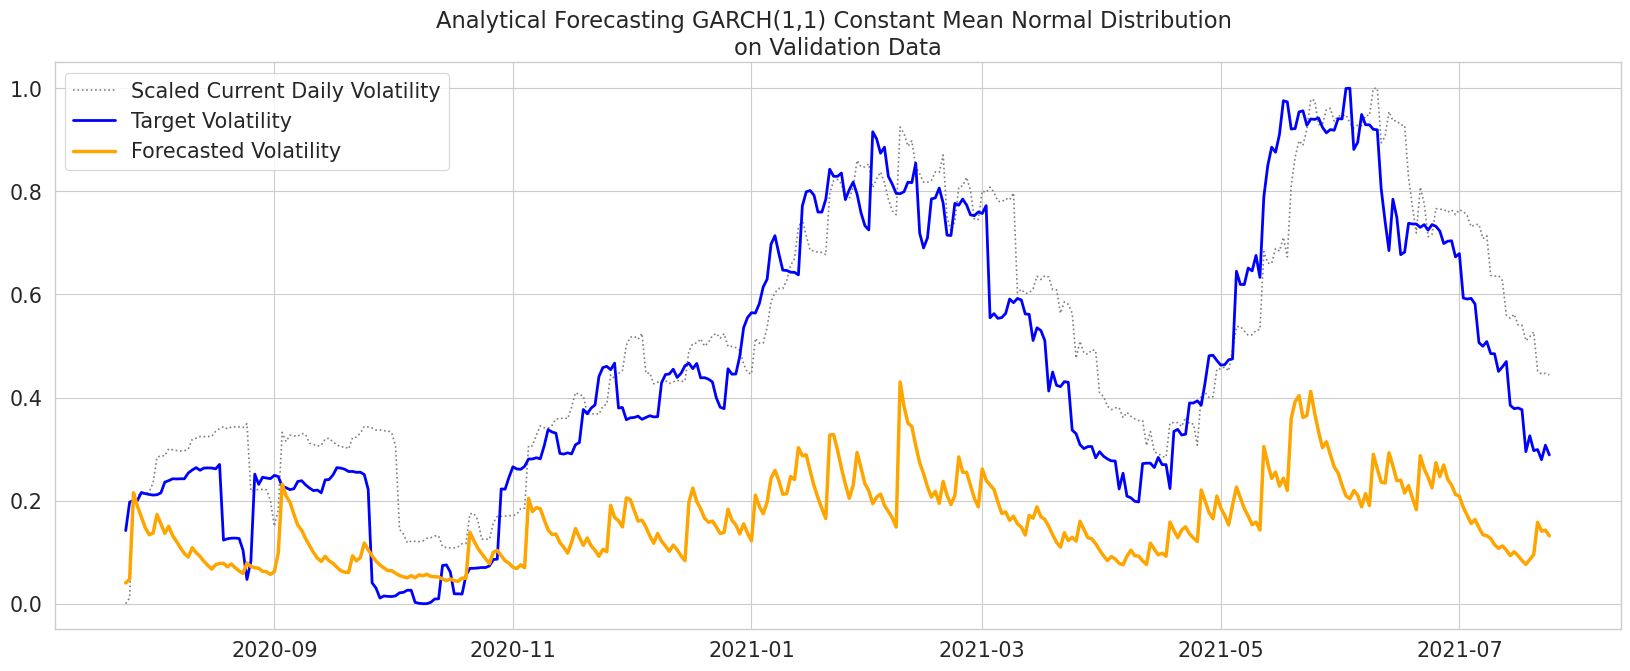

In [102]:
viz_model(y_val_scaled, gm_1_preds_scaled,'Analytical Forecasting GARCH(1,1) Constant Mean Normal Distribution')

GARCH's forecasted volatility appears to be lower side (after normalization)

In [103]:
log_perf(y_val_scaled, gm_1_preds_scaled, 'GARCH(1,1), Constant Mean, Normal Dist')

,Model,Validation RMSPE,Validation RMSE
0,"GARCH(1,1), Constant Mean, Normal Dist",31.801546,0.362331
1,"GARCH(1,1), Constant Mean, Normal Dist",31.801546,0.362331


Lets check the estimated residuals of the GARCH model .

 - residuals are basically the returns minus some mean value obtained using some basic models like ARMA and then we divide it with the std hence standardizing the values


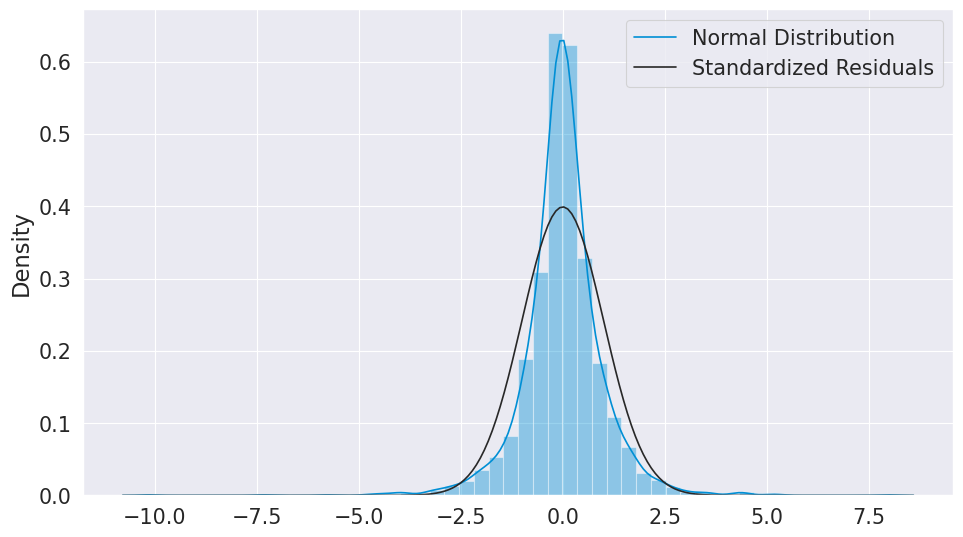

In [104]:
gm_resid = result_1.resid
gm_std = result_1.conditional_volatility

# STANDARDIZING RESIDUALS
#residuals are basically the returns - some mean value obtained using some basic models like ARMA and then we divide it with the std hence standardizing the values
gm_std_resid = gm_resid / gm_std

# VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,6))
    sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50)
    plt.legend(('Normal Distribution', 'Standardized Residuals'))
    plt.show();

This distibution looks more like a Student's T distribution rather than a normal distribution which is also symmetric and bell-shaped like normal distribution; however it has higher peak and fatter tails allowing more values lying further away from the mean.

While fitting the model, I can try specifying dist="t" next time

##GARCH Model with Asymmetric Shocks Responses
The basic GARCH model assumes positive and negative news have similar impact on volatility. However, in reality the market tends to "take the stairs up and the elevator down". In other words, the impact is usually asymmetric, and negative impacts tends to affect the volatility more than positive ones.

There's another member in the GARCH family that accounts for assymmetry of shocks reponses called **GJR-GARCH**

Additional inputs can be used to construct other models. In this case, by setting o to 1, which means the model would include one lag of an asymmetric shock which transforms a GARCH model into a GJR-GARCH model with variance dynamics.

In [121]:
np.random.seed(seed)

gjr_gm = arch_model(r_train, p=1, q=1, o=1,
                    vol='GARCH', dist='skewt')
result_2 = gjr_gm.fit(disp='off')
print(result_2.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:               -5291.01
Distribution:      Standardized Skew Student's t   AIC:                           10596.0
Method:                       Maximum Likelihood   BIC:                           10635.6
                                                   No. Observations:                 2108
Date:                           Tue, Jan 16 2024   Df Residuals:                     2107
Time:                                   01:10:48   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [122]:
scaler_gjr, scaled_gjr_cond_vol = scale_tf_cond_vol(result_2)

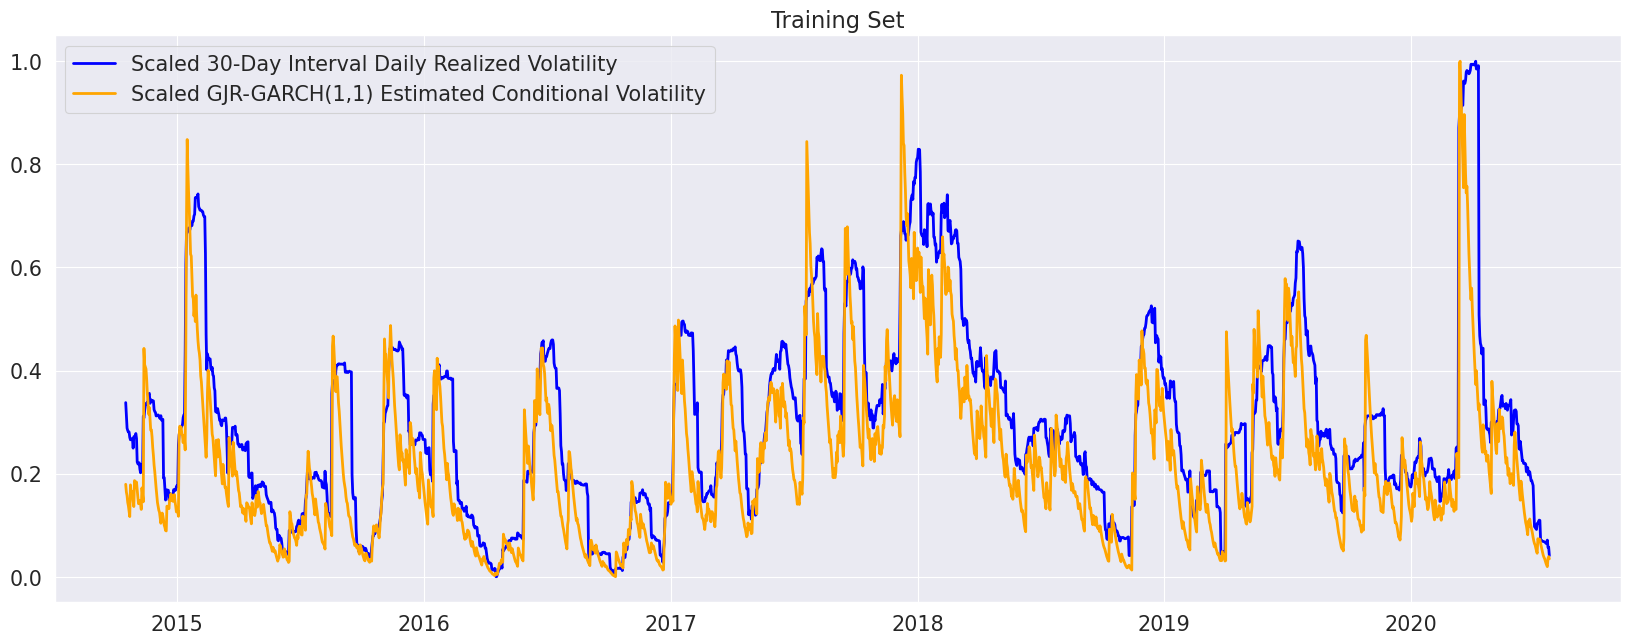

In [123]:
viz_cond_vol(scaled_gjr_cond_vol, 'GJR-GARCH(1,1)')


In [124]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx].dropna()

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, p=1, q=1, o=1,
                       vol='GARCH', dist='skewt')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future,
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gjr_1_preds = pd.DataFrame(rolling_forecasts, index=val_idx)

In [125]:
gjr_1_preds_scaled = pd.Series(scaler_gjr.transform(gjr_1_preds.values.reshape(-1,1))[:,0],index=gjr_1_preds.index) #transform_volatility_to_scaler(scaler_gjr, gjr_1_preds)


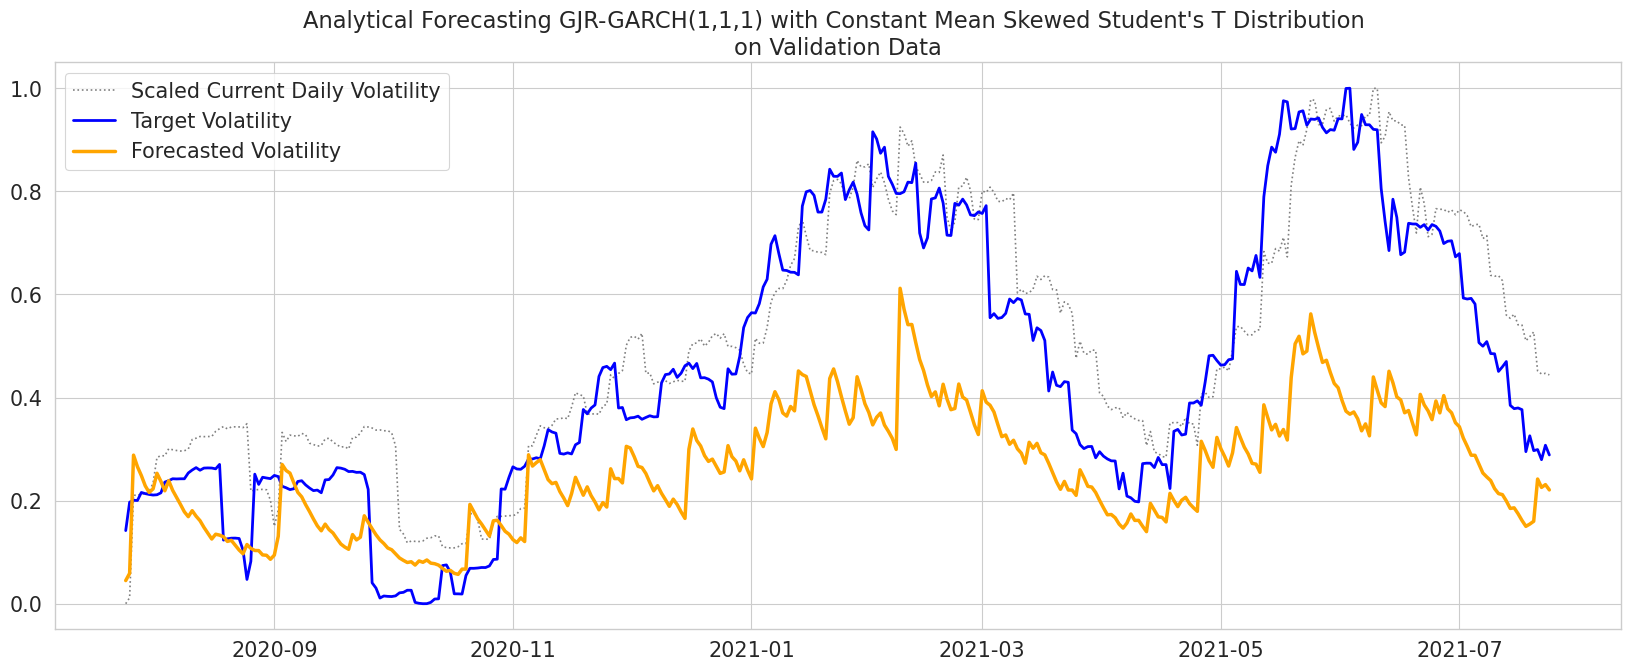

In [126]:
viz_model(y_val_scaled, gjr_1_preds_scaled,
          "Analytical Forecasting GJR-GARCH(1,1,1) with Constant Mean Skewed Student's T Distribution")

In [127]:
log_perf(y_val_scaled, gjr_1_preds_scaled,
         "Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist")

,Model,Validation RMSPE,Validation RMSE
0,"GARCH(1,1), Constant Mean, Normal Dist",31.801546,0.362331
1,"GARCH(1,1), Constant Mean, Normal Dist",31.801546,0.362331
2,"Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist",47.161782,0.261589
3,"Analytical GJR-GARCH(1,1,1), Constant Mean, Skewt Dist",47.290990,0.261725
